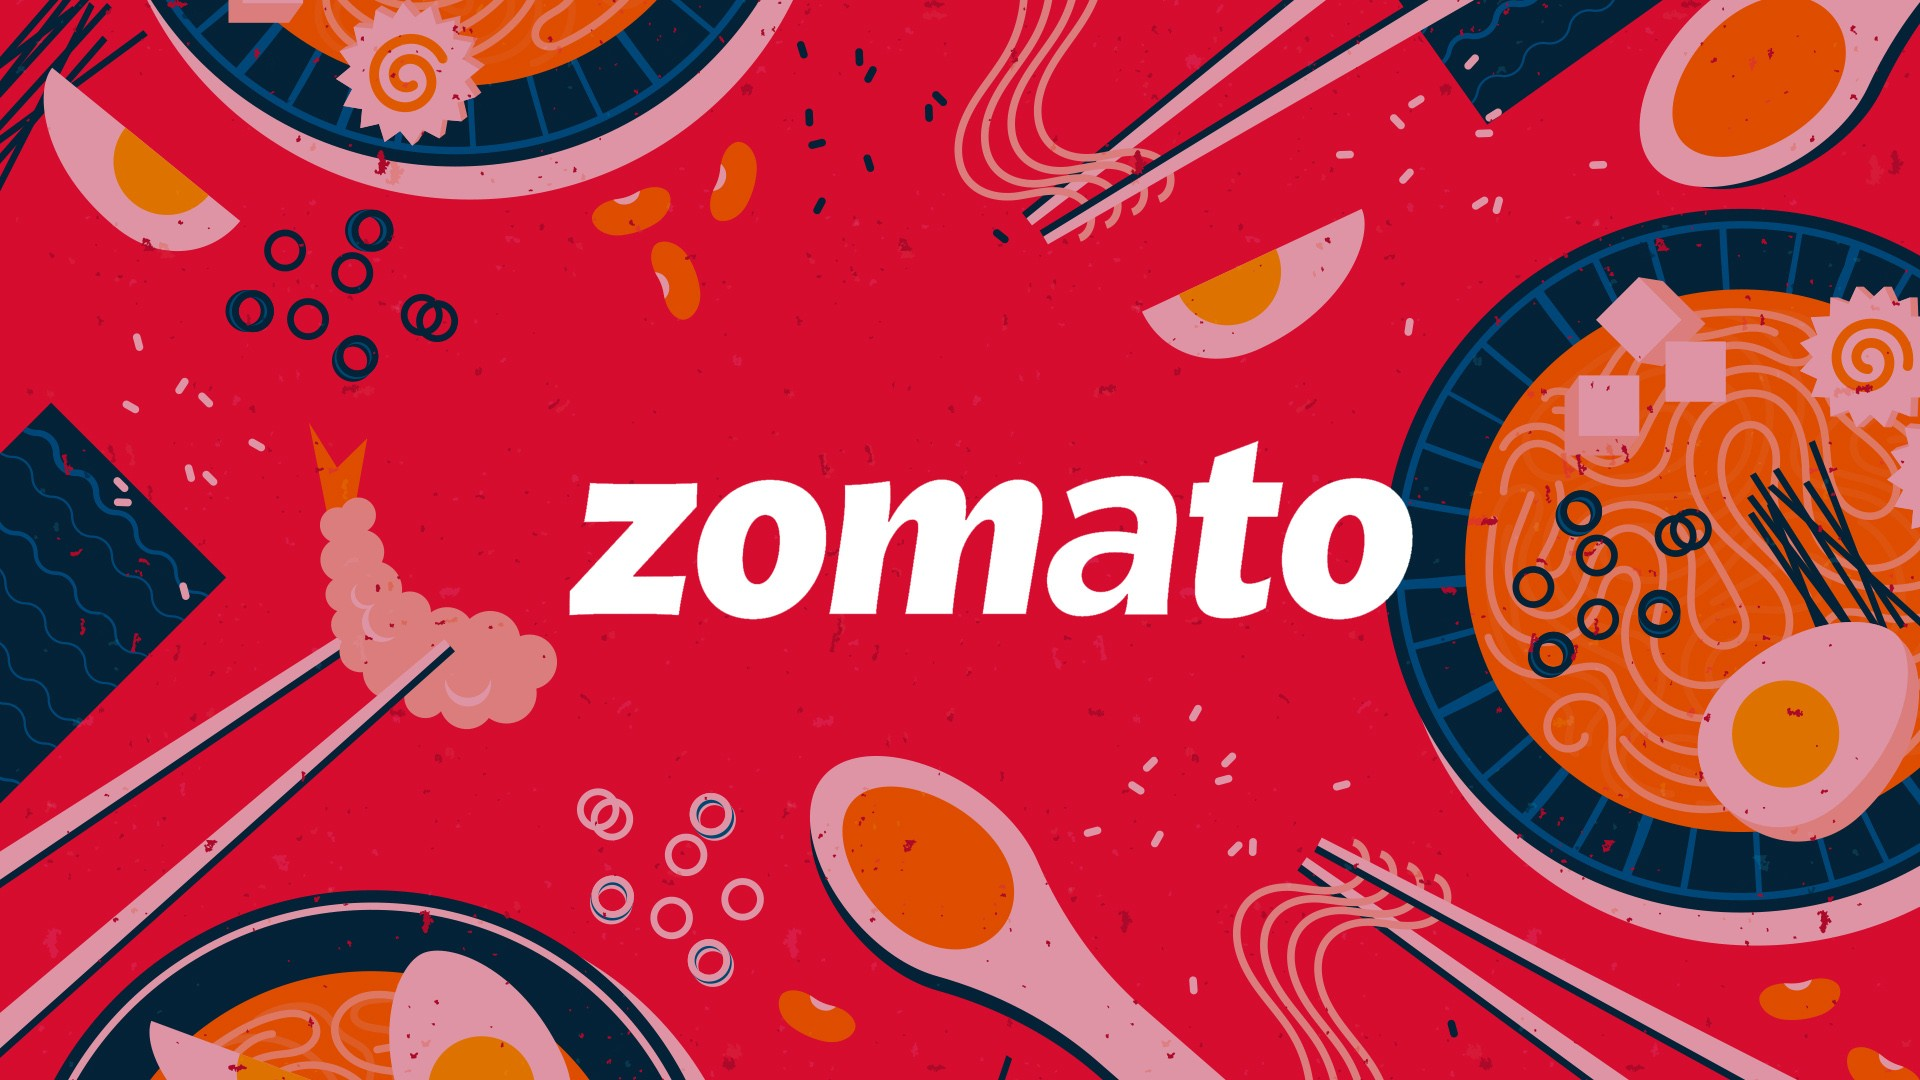

The **Zomato dataset** contains detailed information about restaurants listed on the Zomato platform. The key columns in the dataset are:

- **name**: The name of the restaurant.
- **address**: The location of the restaurant.
- **online_order**: Indicates whether the restaurant accepts online orders (Yes/No).
- **book_table**: Indicates whether the restaurant allows table booking (Yes/No).
- **rate**: The customer rating for the restaurant, usually on a scale of 1-5.
- **votes**: The number of votes or reviews a restaurant has received.
- **phone**: The contact number of the restaurant.
- **location**: The area or locality where the restaurant is situated.
- **rest_type**: The type or category of the restaurant, such as Casual Dining, Café, or Fine Dining.
- **dish_liked**: The dishes that are most liked or frequently ordered by customers.
- **cuisines**: The type of cuisines offered by the restaurant, such as Italian, Chinese, North Indian, etc.
- **approx_cost(for two people)**: The approximate cost for two people to dine at the restaurant.
- **listed_in(type)**: The category under which the restaurant is listed, such as Delivery, Dine-out, or Café.

This project focuses on cleaning and analyzing a Zomato restaurant dataset to uncover insights about various restaurant-related factors. The key steps involved are:

1. **Data Loading and Initial Overview**: The dataset is loaded, and an initial inspection is conducted to understand its structure, including the number of rows, columns, and null values.
2. **Data Cleaning**: 
   - Columns with invalid or inconsistent values (such as unnecessary comments or special characters) are cleaned using custom functions.
   - Missing values are handled through forward filling and replacing them with the most frequent or median values.
   - Columns like `rating`, `votes`, and `cost_for_two` are converted to appropriate data types for further analysis.
3. **Filtering and Transforming Data**: 
   - Frequent values in categorical columns like `location`, `restaurant_type`, and `cuisines` are kept, while less frequent values are filtered out.
   - The `restaurant_type`, `cuisines`, and `popular_dishes` columns are expanded to accommodate multiple values separated by commas.
4. **Handling Duplicates and Missing Data**: Duplicate rows are removed, and missing values are filled to ensure data completeness.
5. **Exploratory Data Analysis (EDA)**:
   - **Correlation Analysis**: A heatmap is used to visualize the relationships between `rating`, `votes`, and `cost_for_two`.
   - **Outlier Detection**: Boxplots are created to identify outliers in the `rating`, `votes`, and `cost_for_two` columns.
6. **Outlier Removal**: A method is applied to remove outliers from the key numeric columns based on the interquartile range (IQR) technique.

This project is an essential step towards understanding restaurant patterns, such as the influence of online ordering and table booking on ratings, customer preferences for dishes and cuisines, and how cost affects customer votes and ratings.

# Data Loading

In [5]:
#Import necessary libraries
import re  #Regular expressions for text manipulation
import numpy as np  #For numerical operations
import pandas as pd  #For data manipulation
import seaborn as sns  #For data visualization
import matplotlib.pyplot as plt  #For plotting
from wordcloud import WordCloud  #For generating word clouds
import warnings  #To handle warnings
warnings.filterwarnings('ignore')  #Ignore warnings for cleaner output

In [6]:
#Load the dataset
zdf=pd.read_csv('zomato.csv')
#Display the first few rows of the dataset
zdf.head()  

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate votes                             phone  \
0          Yes        Yes  4.1/5   775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5   787                      080 41714161   
2          Yes         No  3.8/5   918                    +91 9663487993   
3           No         No  3.7/5    88                    +91 9620009302   
4           No         No  3.8/5   166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people) listed_in(type)  
0  North Indian, Mughlai, Chinese                         800          Buffet  
1     Chinese, North Indian, Thai                         800          Buffet  
2          Cafe, Mexican, Italian                         800          Buffet  
3      South Indian, North Indian                         300          Buffet  
4        North Indian, Rajasthani                         600          Buffet

In [7]:
#Display the columns names present in dataset
zdf.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [8]:
#Rename columns for better readability and consistency
zdf.rename(columns={'rate':'rating','rest_type':'restaurant_type','dish_liked':'popular_dishes','approx_cost(for two people)':'cost_for_two',
                    'listed_in(type)':'category_type'},inplace=True)
#Displaying columns name after successfully renamed
zdf.columns

Index(['address', 'name', 'online_order', 'book_table', 'rating', 'votes',
       'phone', 'location', 'restaurant_type', 'popular_dishes', 'cuisines',
       'cost_for_two', 'category_type'],
      dtype='object')

In [9]:
#Basic info about the dataset
print("Number of rows:",zdf.shape[0])
print("Number of columns:",zdf.shape[1])

Number of rows: 56252
Number of columns: 13


# Initial Overview

In [11]:
#Data types and non-null values for each column
zdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   address          56235 non-null  object
 1   name             56236 non-null  object
 2   online_order     56233 non-null  object
 3   book_table       56194 non-null  object
 4   rating           48414 non-null  object
 5   votes            56174 non-null  object
 6   phone            54956 non-null  object
 7   location         56126 non-null  object
 8   restaurant_type  55914 non-null  object
 9   popular_dishes   28027 non-null  object
 10  cuisines         56049 non-null  object
 11  cost_for_two     55731 non-null  object
 12  category_type    51642 non-null  object
dtypes: object(13)
memory usage: 5.6+ MB


In [12]:
#Check for null values in each column
zdf.isnull().sum()

address               17
name                  16
online_order          19
book_table            58
rating              7838
votes                 78
phone               1296
location             126
restaurant_type      338
popular_dishes     28225
cuisines             203
cost_for_two         521
category_type       4610
dtype: int64

In [13]:
#Display unique values in categorical columns
for column in ['online_order','book_table','rating','votes','location','restaurant_type','popular_dishes','cuisines','cost_for_two','category_type']:
    print(f"{column}:\n",zdf[column].unique())
    print('----'*38)

online_order:
 ['Yes' 'No' " ('Rated 4.0'" ...
 ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place'
 ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt'
 " 'RATED\\n  Beer cafe "]
--------------------------------------------------------------------------------------------------------------------------------------------------------
book_table:
 ['Yes' 'No' " 'RATED\\n  Amazing cafe" ...
 ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles'
 ' but cud be a bit less spicy... otherwise was grt'
 'VR Bengaluru\\nBeen here a few times ']
----------------------------------------------------------------------------------------------------------------

# Data Cleaning

In [15]:
#Define a function to clean invalid data (special characters, leading spaces)
def clean_invalid_data(text):
    special_characters = r'[\[\]\.\?\\!():ÃƒÂƒ\-#]'
    if isinstance(text, str):
        if text.startswith(' ') or re.search(special_characters, text):
            return np.nan
        else:
            return text
    return text

#Apply data cleaning function to relevant columns
for column in ['online_order','book_table','votes','location','restaurant_type','popular_dishes','cuisines','cost_for_two','category_type']:
    zdf[column]=zdf[column].apply(clean_invalid_data)

In [16]:
#Fill missing values in 'popular_dishes' and 'cuisines' using forward fill
zdf['popular_dishes'].fillna(method='ffill',inplace=True)
print(zdf['popular_dishes'].value_counts())
print('----'*38)
zdf['cuisines'].fillna(method='ffill',inplace=True)
print(zdf['cuisines'].value_counts())

popular_dishes
Biryani                                                                              469
Friendly Staff                                                                       352
Gobhi Pakoda, Bajji, Raita, Ginger Tea, Jalapeno Cheese Poppers, Mojito, Chai        331
Chicken Biryani                                                                      277
Paratha                                                                              219
                                                                                    ... 
Veggie Roll, Noodles, Prawn Rolls, Manchurian, Chicken Roll                            1
Butter Chicken, Basmati Rice, Chicken Biryani, Hyderabadi Biryani                      1
Breakfast Buffet, Cocktails, Sunday Brunch, Noodles, Mocktails, Veg Sushi, Salads      1
Chocolate Truffle Cake, Cheesecake                                                     1
Burgers, Fries, Mojito, Chicken Burger                                                 1
Name: 

In [17]:
#Clean binary 'Yes/No' columns and fill missing values with the most frequent value
def clean_yes_no(column):
    return column.apply(lambda x: x if x in ['Yes','No'] else np.nan)

zdf['online_order']=clean_yes_no(zdf['online_order'])
print('online_order\n',zdf.online_order.unique())
print('----'*8)
zdf['book_table']=clean_yes_no(zdf['book_table'])
print('book_table\n',zdf.book_table.unique())

online_order
 ['Yes' 'No' nan]
--------------------------------
book_table
 ['Yes' 'No' nan]


In [18]:
#Fill missing values with mode (most frequent value)
zdf['online_order'].fillna(zdf['online_order'].mode()[0],inplace=True)
print(zdf.online_order.value_counts())
print('----'*8)
zdf['book_table'].fillna(zdf['book_table'].mode()[0],inplace=True)
print(zdf.book_table.value_counts())

online_order
Yes    34979
No     21273
Name: count, dtype: int64
--------------------------------
book_table
No     49803
Yes     6449
Name: count, dtype: int64


In [19]:
#Clean and process the 'rating' column
def clean_rating(text):
    special_characters = r'[\[\]\\?\\!():ÃƒÂƒ\-#]'
    if isinstance(text, str):
        if text.startswith(' ') or re.search(special_characters, text):
            return np.nan
        else:
            return text
    return text

zdf['rating']=zdf['rating'].apply(clean_rating)
zdf['rating']=zdf['rating'].str.replace('/5','') #Remove '/5' from ratings
zdf['rating']=pd.to_numeric(zdf['rating'],errors='coerce') #Convert to numeric
zdf['rating'].fillna(method='ffill',inplace=True) #Forward fill missing ratings
print(zdf['rating'].unique())
print('----'*20)
print("Data type of rating:",zdf.rating.dtype)

[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]
--------------------------------------------------------------------------------
Data type of rating: float64


In [20]:
#Convert 'votes' column to numeric and fill missing values with median
zdf['votes']=pd.to_numeric(zdf['votes'],errors='coerce')
zdf['votes'].fillna(zdf['votes'].median(),inplace=True)
print(zdf['votes'].unique())
print('----'*12)
print("Data type of votes:",zdf.votes.dtype)

[ 775.  787.  918. ... 4957. 2382.  843.]
------------------------------------------------
Data type of votes: float64


In [21]:
#Clean and process the 'cost_for_two' column
zdf['cost_for_two']=zdf['cost_for_two'].str.replace(',','')
zdf['cost_for_two']=pd.to_numeric(zdf['cost_for_two'],errors='coerce')
zdf['cost_for_two'].fillna(method='ffill',inplace=True)
print(zdf['cost_for_two'].unique())
print('----'*15)
print("Data type of cost_for_two",zdf.cost_for_two.dtype)

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700. 1400.  180. 1350. 2200.
 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 1250. 3500.
 4000. 2400. 2600.  120. 1450.  469.   70. 3200.   60.  560.  240.  360.
 6000. 1050. 2300. 4100. 5000. 3700. 1650. 2700. 4500.  140.]
------------------------------------------------------------
Data type of cost_for_two float64


# Filtering and Transforming Data

In [23]:
#Filter columns with frequent values above a certain threshold
def filter_frequent_values(df, columns,threshold=10):
    for col in columns:
        value_counts=df[col].value_counts()
        frequent_values=value_counts[value_counts>=threshold].index
        df[col]=df[col].apply(lambda x: x if x in frequent_values else None)
    return df

#Apply filter to relevant columns
columns_to_filter=['location','restaurant_type','cuisines','popular_dishes']
zdf=filter_frequent_values(zdf,columns_to_filter)

In [24]:
#Fill missing values in 'location' using forward fill
zdf['location'].fillna(method='ffill',inplace=True)
zdf['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar',
       'South Bangalore', 'City Market', 'Bannerghatta Road', 'BTM',
       'Kanakapura Road', 'Bommanahalli', 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Malleshwaram',
       'Sesh

In [25]:
#Split and clean 'restaurant_type', 'cuisines', and 'popular_dishes' into individual categories
for column in ['restaurant_type','cuisines','popular_dishes']:
    zdf[column]=zdf[column].str.split(',',expand=True).stack().str.strip().reset_index(drop=True)
    print(f"{column}:\n", zdf[column].unique())
    print('----'*38)

restaurant_type:
 ['Casual Dining' 'Cafe' 'Quick Bites' 'Delivery' 'Mess' 'Dessert Parlor'
 'Bakery' 'Pub' 'Takeaway' 'Fine Dining' 'Beverage Shop' 'Sweet Shop'
 'Bar' 'Confectionery' 'Kiosk' 'Food Truck' 'Microbrewery' 'Lounge'
 'Food Court' 'Dhaba' 'Club' 'Irani Cafee']
--------------------------------------------------------------------------------------------------------------------------------------------------------
cuisines:
 ['North Indian' 'Mughlai' 'Chinese' 'Cafe' 'Mexican' 'Italian'
 'South Indian' 'Rajasthani' 'Pizza' 'Continental' 'American' 'Fast Food'
 'Beverages' 'Bakery' 'Desserts' 'Biryani' 'Thai' 'Momos' 'Street Food'
 'Burger' 'Rolls' 'Ice Cream' 'Andhra' 'Healthy Food' 'Salad' 'Kebab'
 'Mithai' 'Iranian' 'Sandwich' 'Mangalorean' 'Juices' 'Vietnamese' 'Asian'
 'Arabian' 'BBQ' 'Seafood' 'Tea' 'Lebanese' 'Finger Food' 'Tibetan'
 'French' 'European' 'Mediterranean' 'Bengali' 'Middle Eastern' 'Kerala'
 'Charcoal Chicken' 'Bihari' 'Maharashtrian' 'African' 'Turkish'
 'R

In [26]:
#Clean 'category_type' and consolidate uncommon categories
def clean_category_type(value,common_values):
    if pd.isnull(value):
        return pd.NaT
    elif value in common_values:
        return value
    else:
        return 'Other'

#Define top categories and clean the 'category_type' column
top_categories=zdf['category_type'].value_counts()[:6].index.tolist()
zdf['category_type']=zdf['category_type'].apply(clean_category_type,common_values=top_categories)
zdf['category_type'].fillna(method='ffill',inplace=True)
zdf['category_type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Drinks & nightlife',
       'Other', 'Pubs and bars'], dtype=object)

# Handling Duplicates and Missing Data

In [28]:
#Drop unnecessary columns
zdf=zdf.drop(['address','name','phone'],axis=1)

In [29]:
#Check for null values in each column
zdf.isna().sum()

online_order       0
book_table         0
rating             0
votes              0
location           0
restaurant_type    0
popular_dishes     0
cuisines           0
cost_for_two       0
category_type      0
dtype: int64

In [30]:
#Check for duplicate values in each column
zdf[zdf.duplicated()].count()

online_order       13
book_table         13
rating             13
votes              13
location           13
restaurant_type    13
popular_dishes     13
cuisines           13
cost_for_two       13
category_type      13
dtype: int64

In [31]:
#Remove duplicates from columns
zdf=zdf.drop_duplicates(keep='first')
zdf[zdf.duplicated()]

Empty DataFrame
Columns: [online_order, book_table, rating, votes, location, restaurant_type, popular_dishes, cuisines, cost_for_two, category_type]
Index: []

# Exploratory Data Analysis (EDA)

In [33]:
#Data types and non-null values for each column
zdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56239 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     56239 non-null  object 
 1   book_table       56239 non-null  object 
 2   rating           56239 non-null  float64
 3   votes            56239 non-null  float64
 4   location         56239 non-null  object 
 5   restaurant_type  56239 non-null  object 
 6   popular_dishes   56239 non-null  object 
 7   cuisines         56239 non-null  object 
 8   cost_for_two     56239 non-null  float64
 9   category_type    56239 non-null  object 
dtypes: float64(3), object(7)
memory usage: 4.7+ MB


In [34]:
#Summary of the numerical columns in the dataset
zdf.describe().round(2)

rating     votes  cost_for_two
count  56239.00  56239.00       56239.0
mean       3.69    264.19         587.2
std        0.46    773.66         460.3
min        1.80      0.00          40.0
25%        3.40      8.00         300.0
50%        3.70     41.00         450.0
75%        4.00    171.00         700.0
max        4.90  16832.00        6000.0

In [35]:
#Summary of the categorical (non-numerical) columns.
zdf.describe(include="object")

online_order book_table location restaurant_type popular_dishes  \
count         56239      56239    56239           56239          56239   
unique            2          2       84              22           1476   
top             Yes         No      BTM     Quick Bites          Pasta   
freq          34976      49790     5307           19639           1772   

            cuisines category_type  
count          56239         56239  
unique            88             7  
top     North Indian      Delivery  
freq            9955         27600

## Correlation Analysis

In [37]:
#Correlation matrix for numeric columns
corr=zdf[['rating','votes','cost_for_two']].corr()
corr.round(2)

rating  votes  cost_for_two
rating          1.00   0.37          0.43
votes           0.37   1.00          0.33
cost_for_two    0.43   0.33          1.00

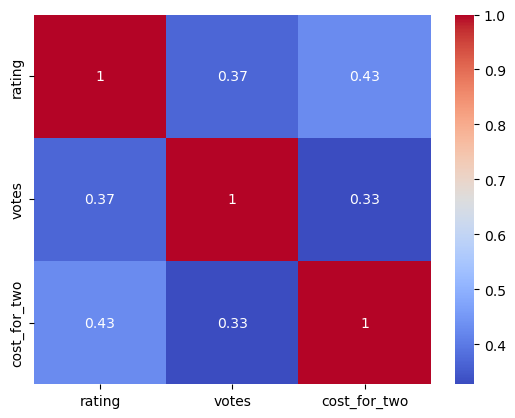

In [38]:
#Heatmap for numeric columns
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## Outlier Detection

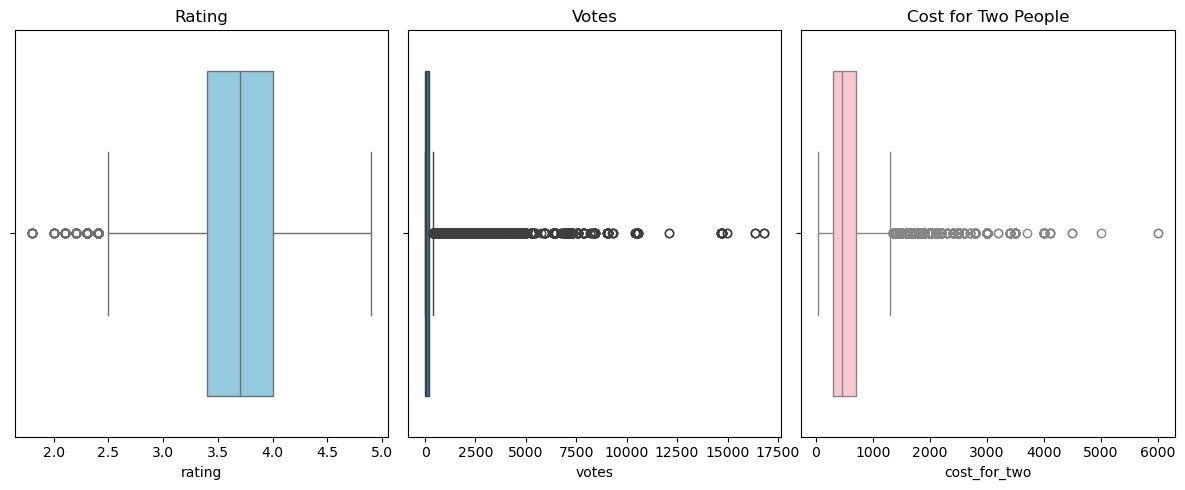

In [40]:
#Visualize distribution of numeric columns with boxplots
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.boxplot(zdf['rating'],orient='h',color='skyblue')
plt.title("Rating")

plt.subplot(132)
sns.boxplot(zdf['votes'],orient='h')
plt.title("Votes")

plt.subplot(133)
sns.boxplot(zdf['cost_for_two'],orient='h',color='pink')
plt.title("Cost for Two People")

plt.tight_layout()
plt.show()

## Outlier Removal

In [42]:
#Remove outliers using the IQR method
columns_to_process=['rating','votes','cost_for_two']
def remove_outliers(data,col):
    Q1, Q3=data[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))

In [43]:
#Apply outlier removal for relevant columns
for col in columns_to_process:
    zdf[col]=remove_outliers(zdf,col)

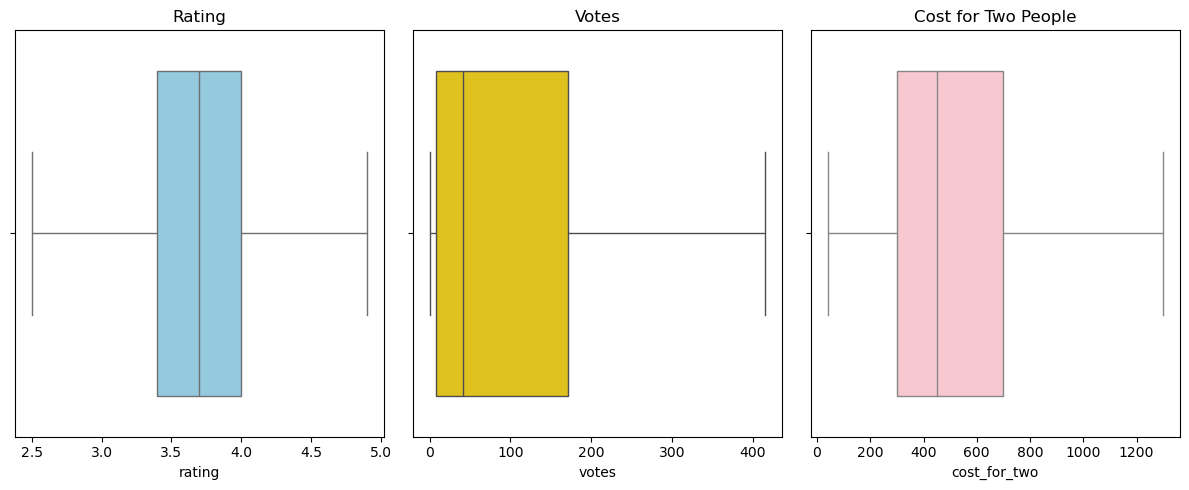

In [44]:
#Visualize distribution of numeric columns with boxplots after removing outliers
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.boxplot(zdf['rating'],orient='h',color='skyblue')
plt.title("Rating")

plt.subplot(132)
sns.boxplot(zdf['votes'],orient='h',color='gold')
plt.title("Votes")

plt.subplot(133)
sns.boxplot(zdf['cost_for_two'],orient='h',color='pink')
plt.title("Cost for Two People")

plt.tight_layout()
plt.show()

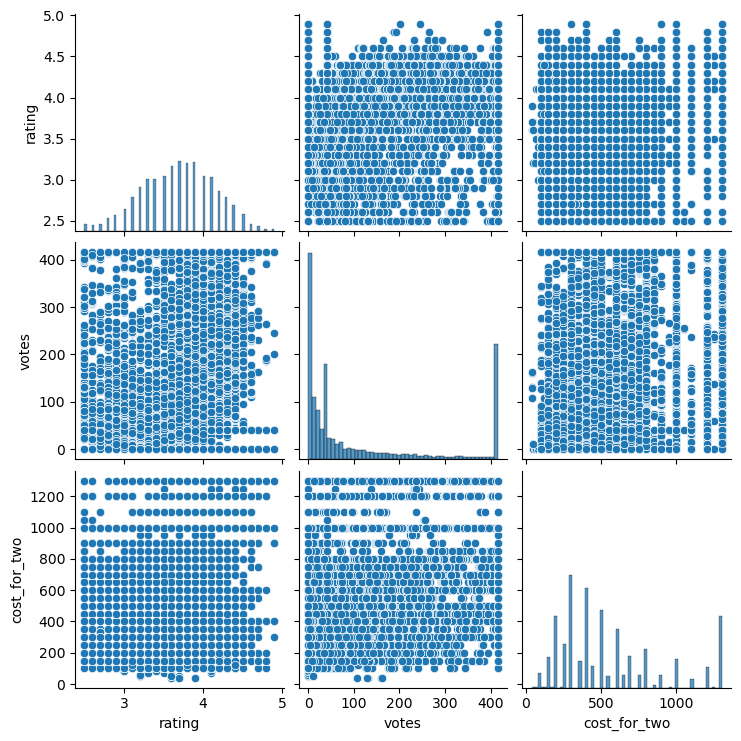

In [45]:
#Visualize numeric columns with pairplot
sns.pairplot(zdf[['rating','votes','cost_for_two']])
plt.show()

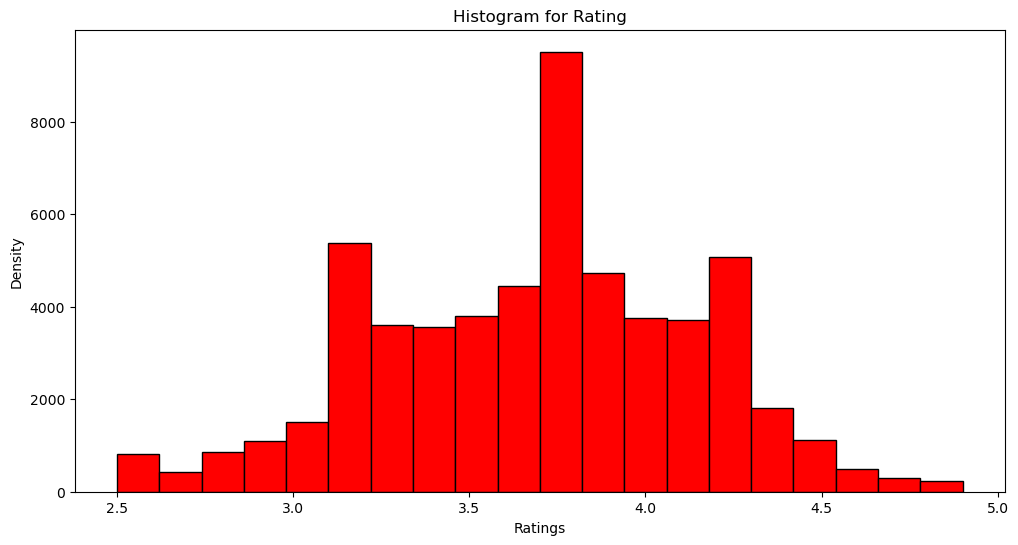

In [46]:
#Histograms for Ratings
plt.figure(figsize=(12,6))
plt.hist(zdf['rating'],bins=20,color='red',edgecolor='black')
plt.title("Histogram for Rating")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.show()

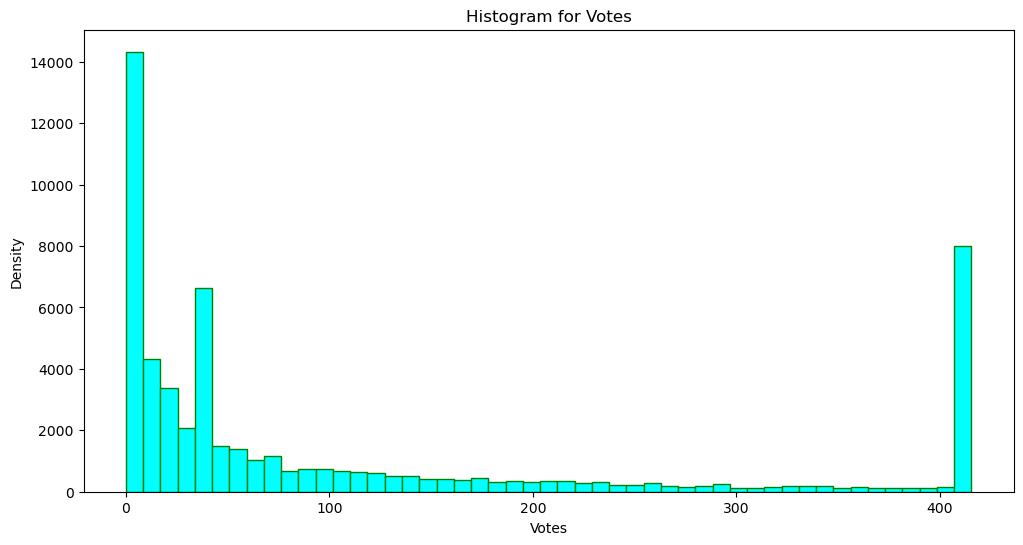

In [47]:
#Histogram for Votes
plt.figure(figsize=(12,6))
plt.hist(zdf['votes'],bins='auto',color='cyan',edgecolor='green')
plt.title("Histogram for Votes")
plt.xlabel("Votes")
plt.ylabel("Density")
plt.show()

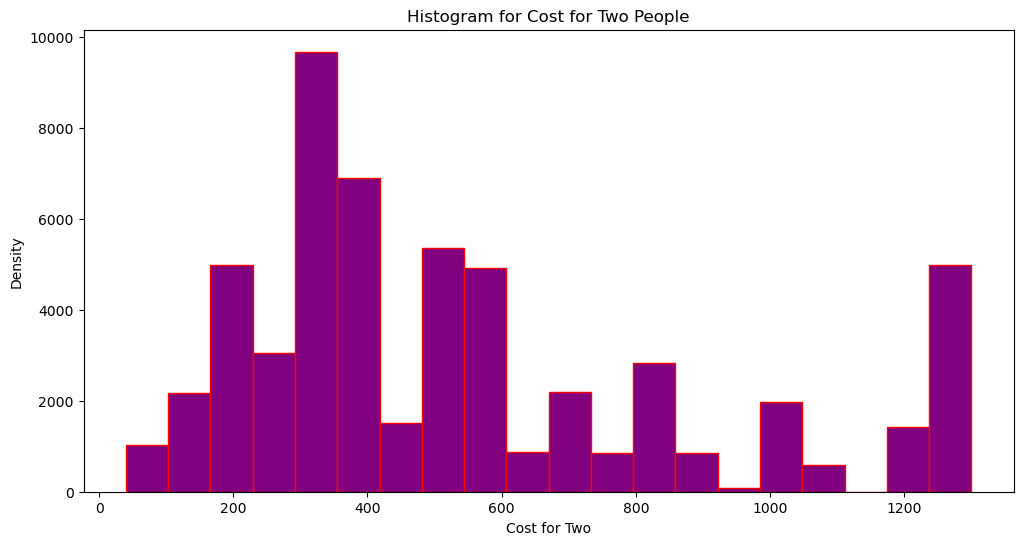

In [48]:
#Histogram for Cost for two people
plt.figure(figsize=(12,6))
plt.hist(zdf['cost_for_two'],bins=20,color='purple',edgecolor='red')
plt.title("Histogram for Cost for Two People")
plt.xlabel("Cost for Two")
plt.ylabel("Density")
plt.show()

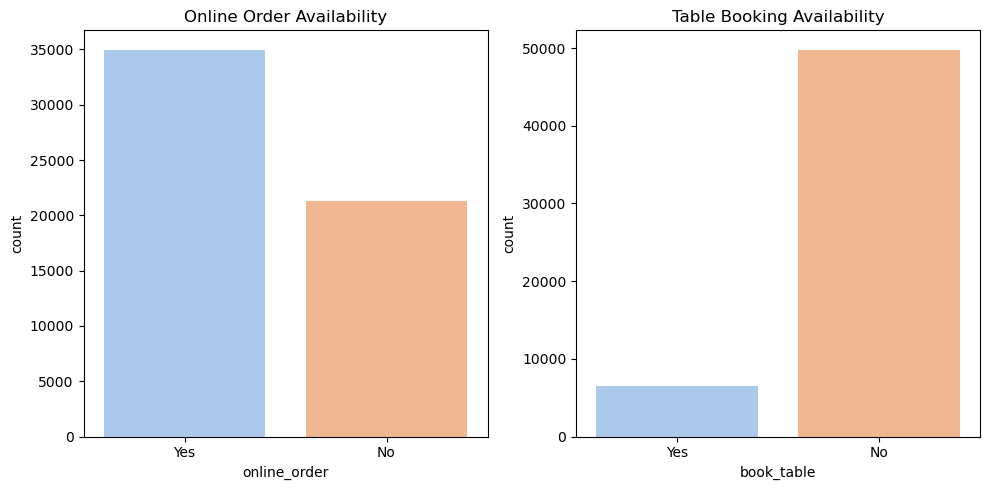

In [49]:
#Visualize categorical columns using count plots
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='online_order',data=zdf,palette='pastel')
plt.title("Online Order Availability")

plt.subplot(122)
sns.countplot(x='book_table',data=zdf,palette='pastel')
plt.title("Table Booking Availability")

plt.tight_layout()
plt.show()

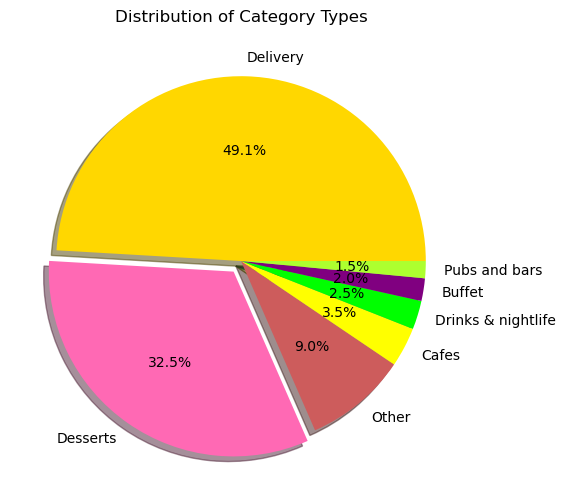

In [50]:
#Pie chart for 'category_type' distribution
category_counts=zdf['category_type'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',shadow=True,explode=(0,0.07,0,0,0,0,0),
        colors=('gold','hotpink','indianred','yellow','lime','purple','greenyellow'))
plt.title("Distribution of Category Types")
plt.show()

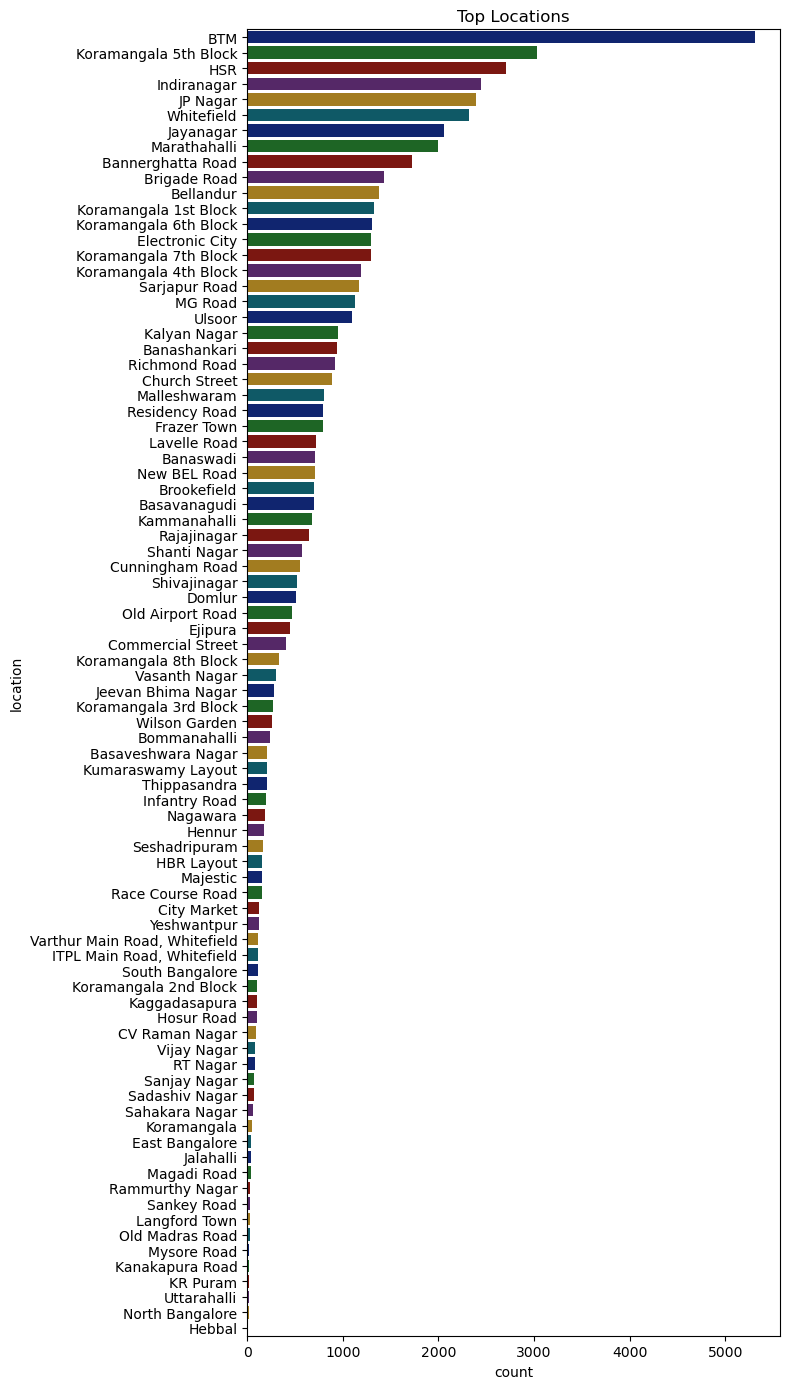

In [51]:
#Visualize top locations using countplot
plt.figure(figsize=(8,14))
sns.countplot(y='location',data=zdf,palette='dark6',order=zdf['location'].value_counts().index)
plt.title("Top Locations")
plt.tight_layout()
plt.show()

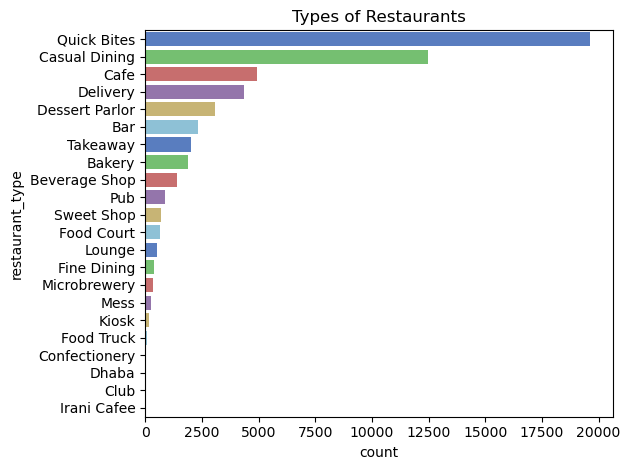

In [52]:
#Visualize types of restaurants using countplot
sns.countplot(y="restaurant_type",data=zdf,palette='muted6',order=zdf['restaurant_type'].value_counts().index)
plt.title("Types of Restaurants")
plt.tight_layout()
plt.show()

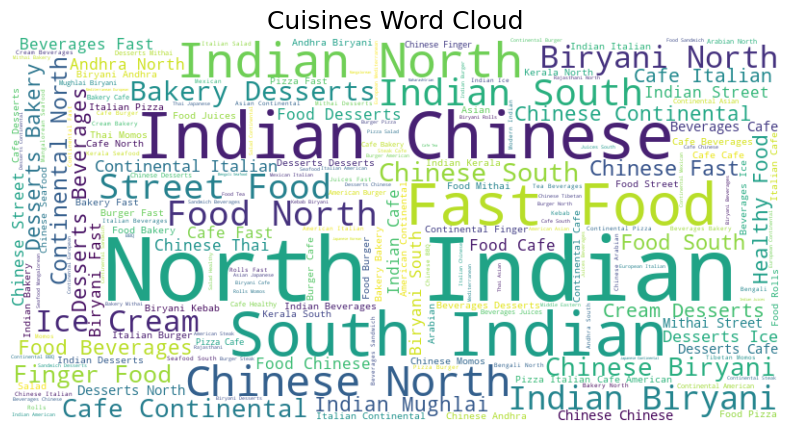

In [53]:
#WordCloud for 'cuisines' and 'popular_dishes' 
def generate_wordcloud(text_data,title):
    wordcloud=WordCloud(width=800,height=400,background_color='white',colormap='viridis').generate(text_data)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title,fontsize=18)
    plt.show()

#Generate word cloud for cuisines
cuisines_text=' '.join(zdf['cuisines'].dropna().astype(str))
generate_wordcloud(cuisines_text,"Cuisines Word Cloud")

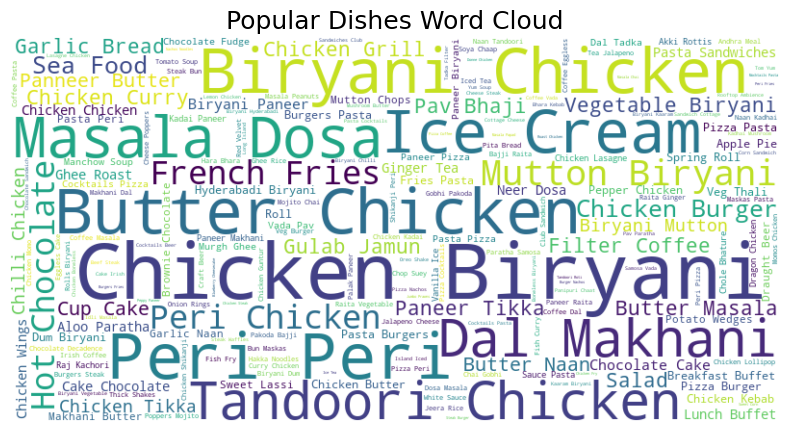

In [54]:
#Generate word cloud for popular dishes
popular_dishes_text=' '.join(zdf['popular_dishes'].dropna().astype(str))
generate_wordcloud(popular_dishes_text,"Popular Dishes Word Cloud")